In [74]:
import oceanspy as ospy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaduck as sd
from functools import partial
import xarray as xr

mpl.rcParams['figure.dpi'] = 300

In [8]:
fjord = ospy.open_oceandataset.from_catalog("KangerFjord")

Opening KangerFjord.
A realistic numerical model constructed to simulate the oceanic conditions
and circulation in a large southeast Greenland fjord (Kangerdlugssuaq) and
the adjacent shelf sea region during winter 2007–2008.
Citation:
 * Fraser et al., 2018 - JGR.


In [33]:
fjord = od

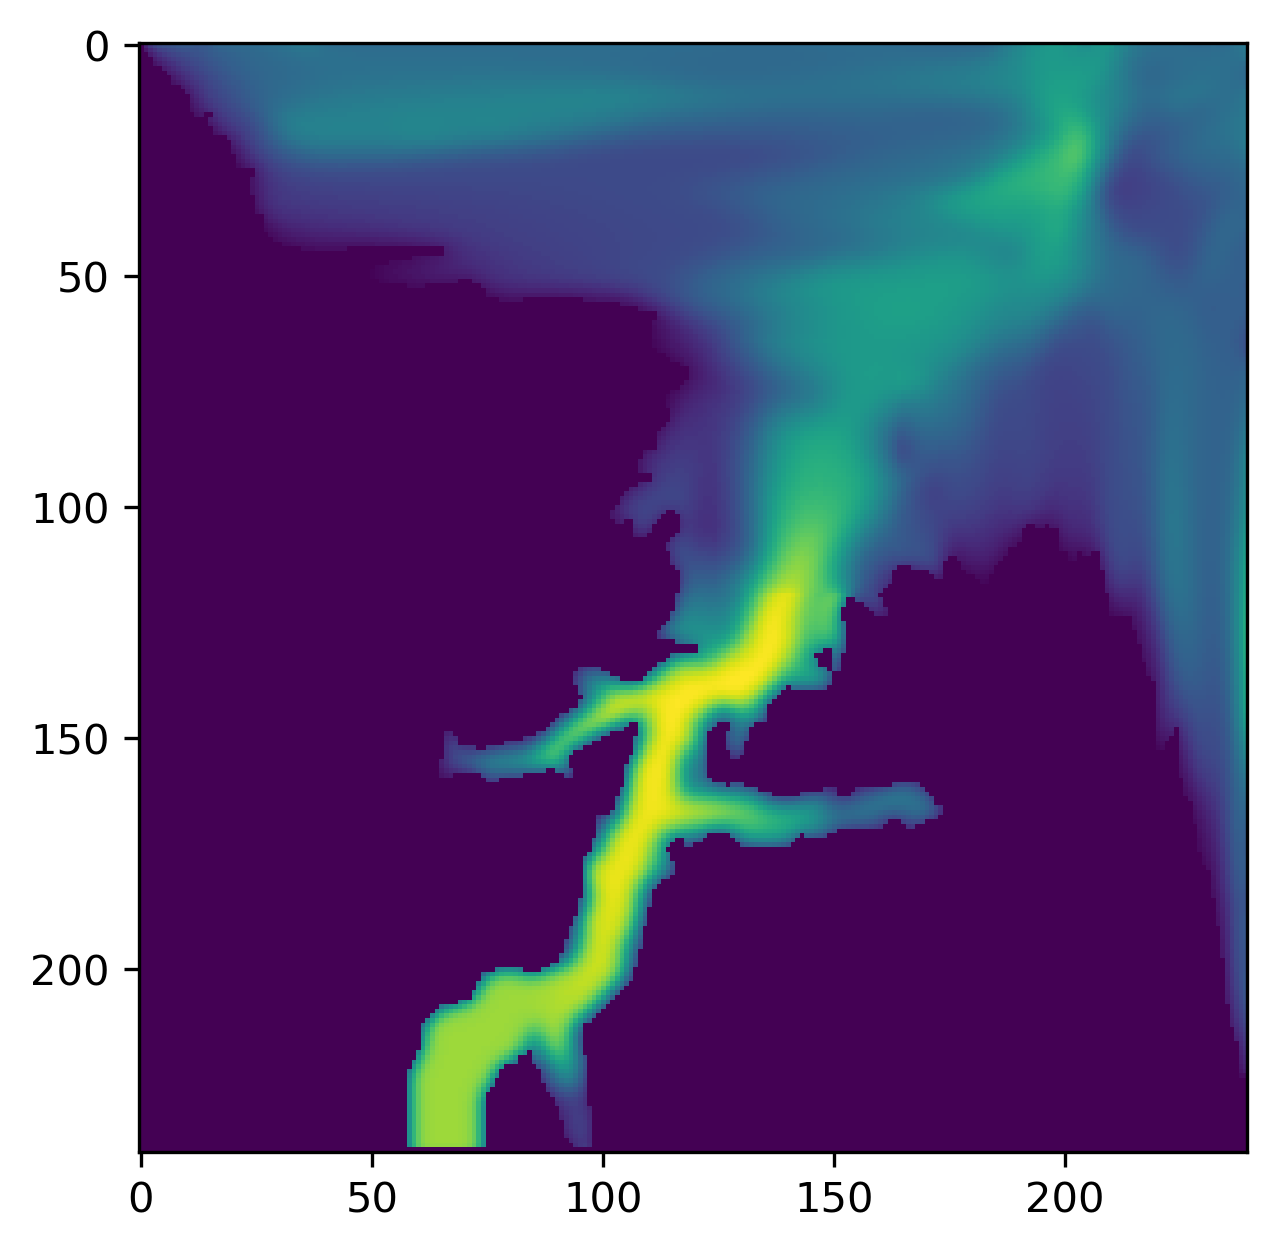

In [38]:
plt.imshow(fjord._ds.Depth)

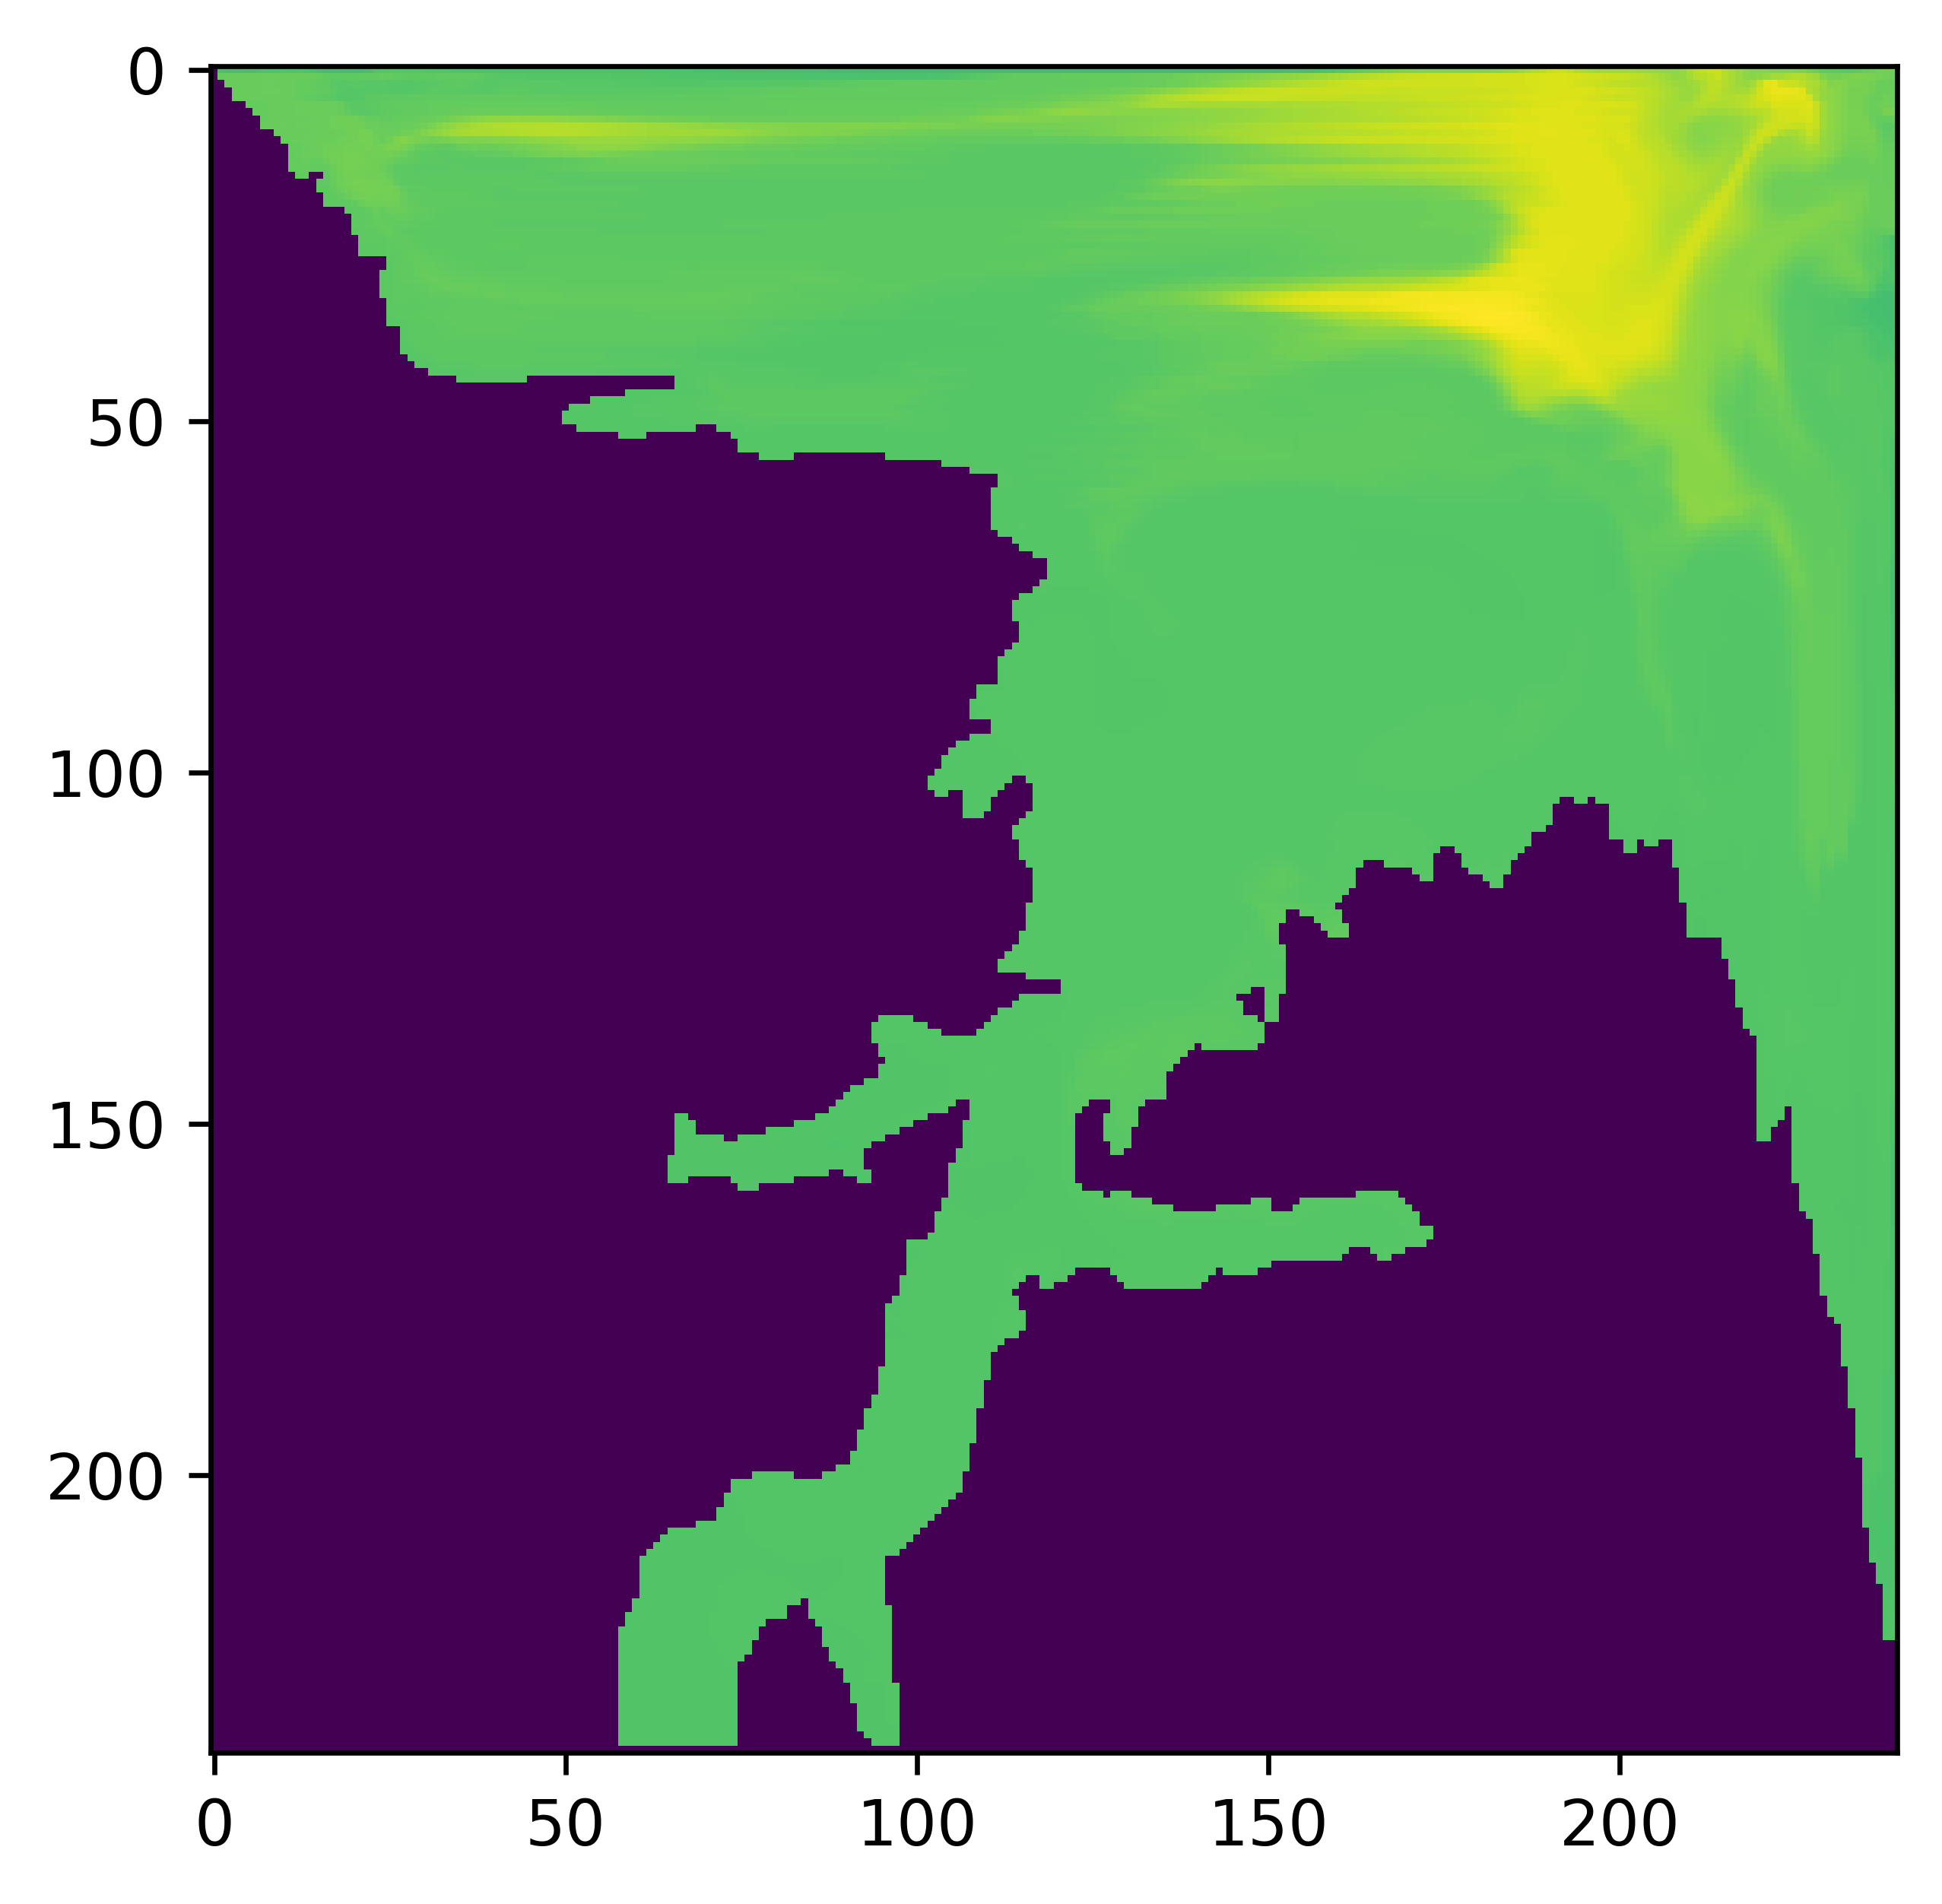

In [35]:
plt.imshow(fjord._ds.S[300,0],vmin = 30)

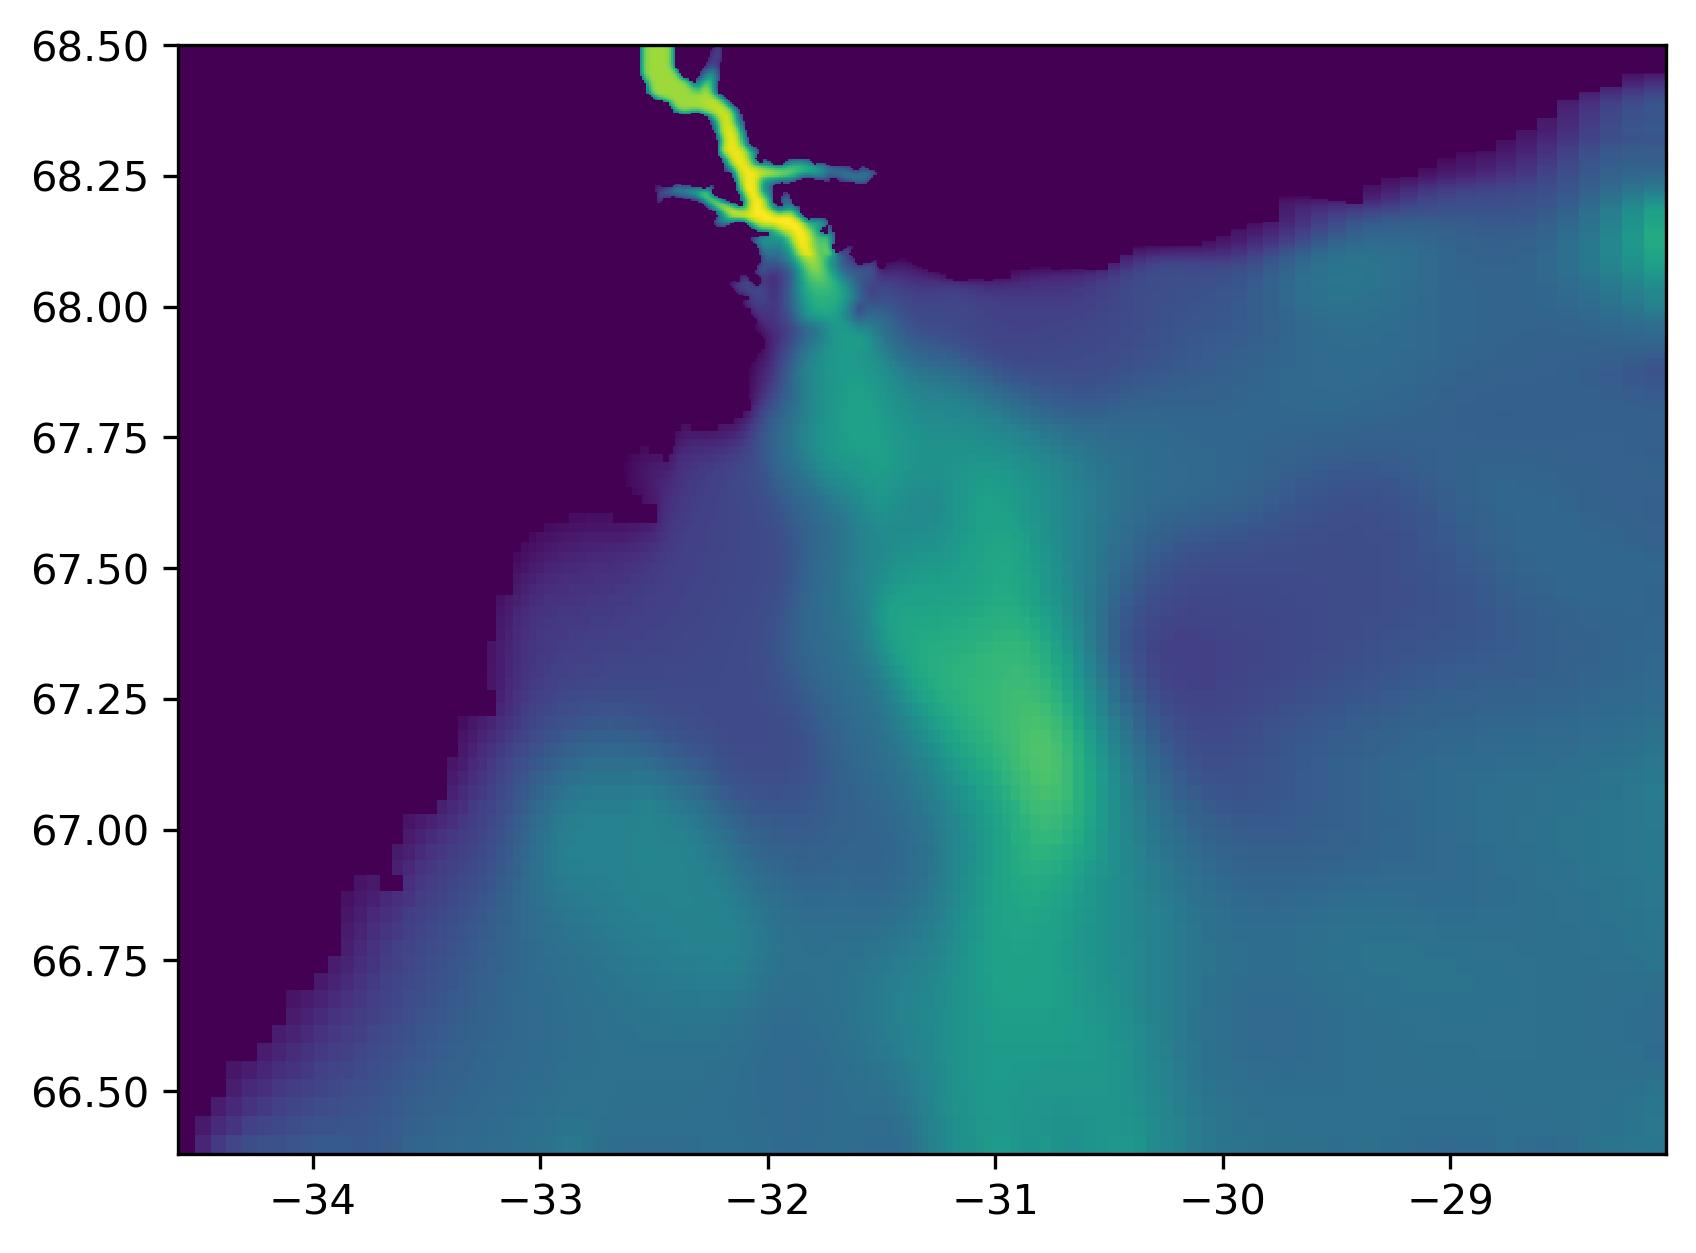

In [53]:
plt.pcolormesh(fjord._ds.XC,fjord._ds.YC,fjord._ds.Depth)

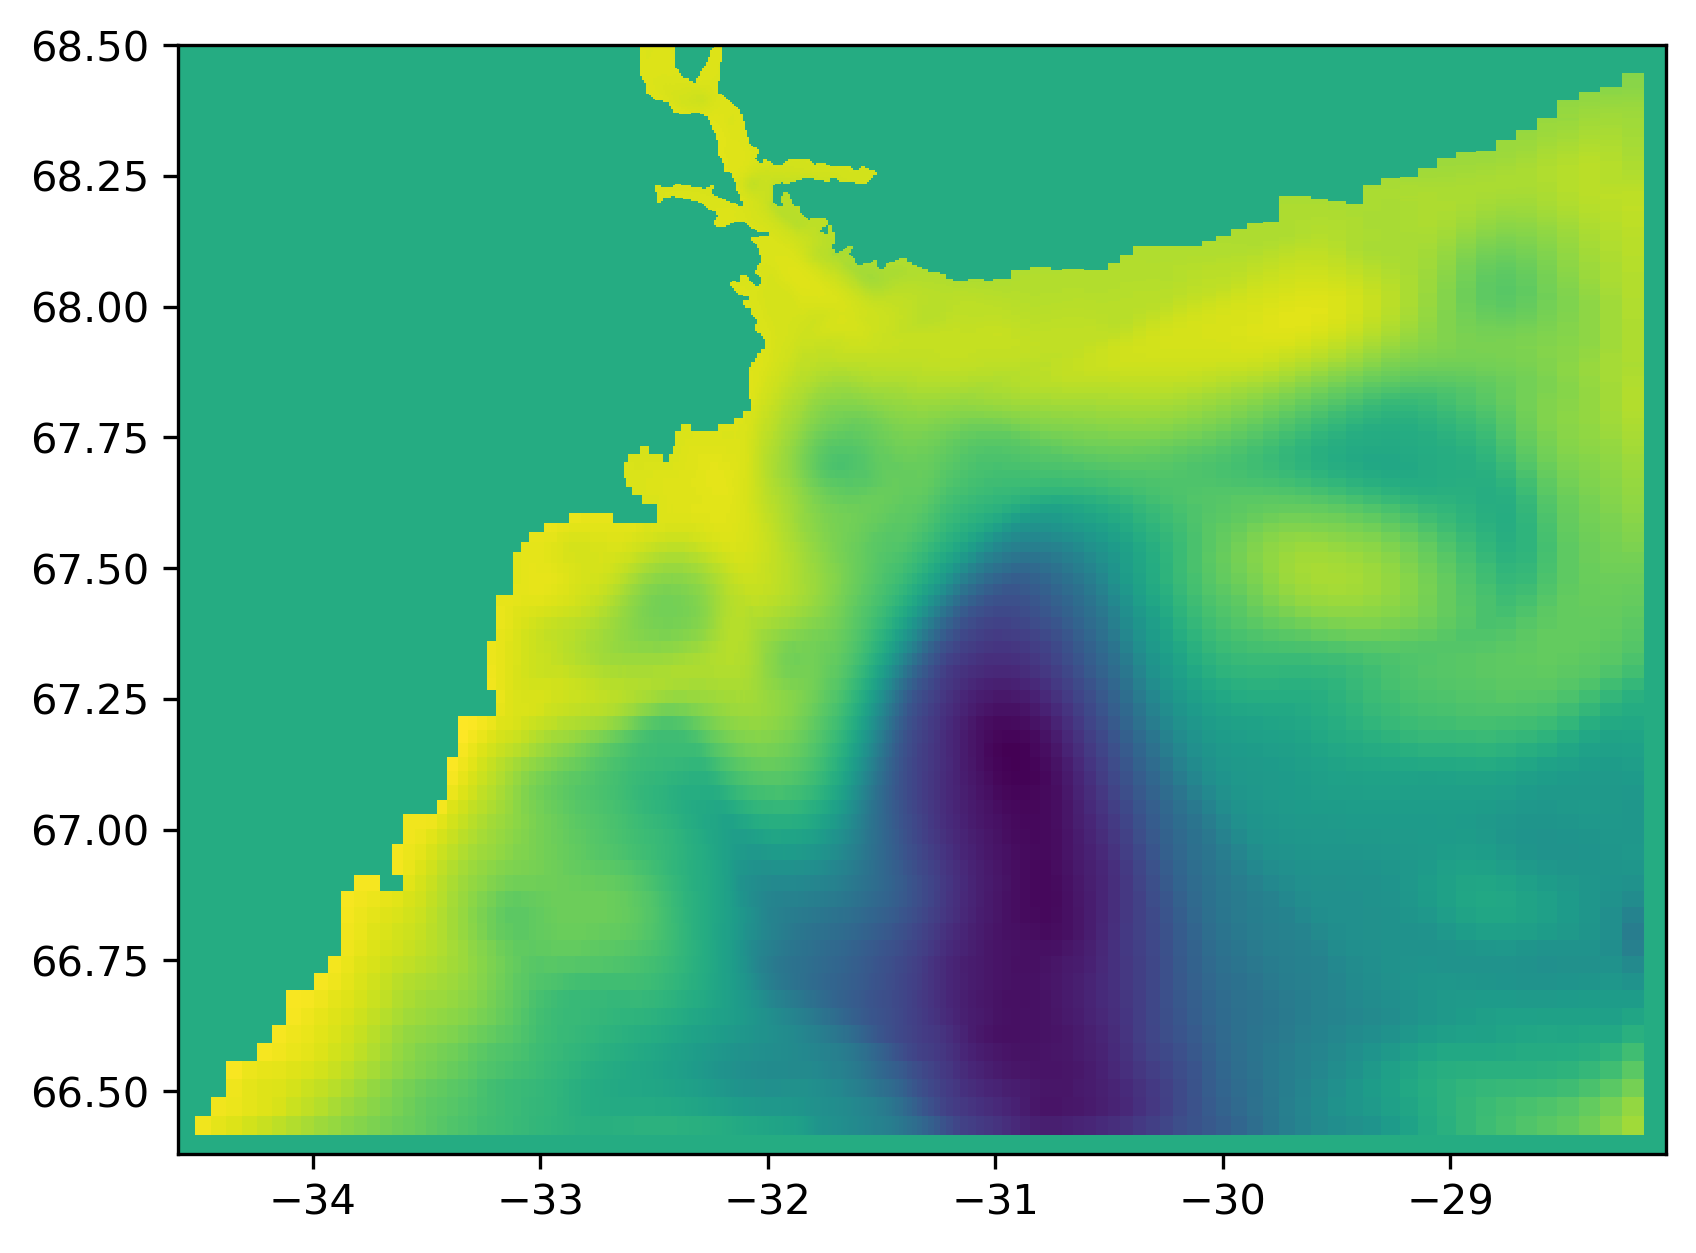

In [56]:
plt.pcolormesh(fjord._ds.XC,fjord._ds.YC,fjord._ds.Eta[263])

In [20]:
fjord._ds.XC.max(),fjord._ds.XC.min()

(<xarray.DataArray 'XC' ()>
 array(-28.099405),
 <xarray.DataArray 'XC' ()>
 array(-34.5546825))

In [55]:
p.it

array([263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263,
       263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263,
       263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263,
       263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263,
       263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263,
       263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263,
       263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263,
       263, 263, 263, 263, 263, 263, 263, 263, 263])

In [30]:
fjord._ds.YC.max(),fjord._ds.YC.min()

(<xarray.DataArray 'YC' ()>
 array(68.49834395),
 <xarray.DataArray 'YC' ()>
 array(66.398219))

In [41]:
tub = sd.OceData(fjord._ds)

In [59]:
x = tub.XC.ravel()
y = tub.YC.ravel()
z = np.ones_like(x)*-5.0
t = np.ones_like(x)*sd.utils.convert_time('2008-01-01')

In [40]:
east = -34.55
west = -28.10
south = 66.40
north = 68.49

Nlon = 10
Nlat = Nlon
Ndep = 1
x,y,z,t = sd.utils.easy_3d_cube(
    (east, west, Nlon),
    (south,north,Nlat),
    (-5.0,-5.0,Ndep),
    '2008-01-01'
)

In [60]:
p = sd.Position().from_latlon(x,y,z,t,data = tub)

In [61]:
kernel = sd.KnW()

In [62]:
eta = p.interpolate('Eta',kernel)

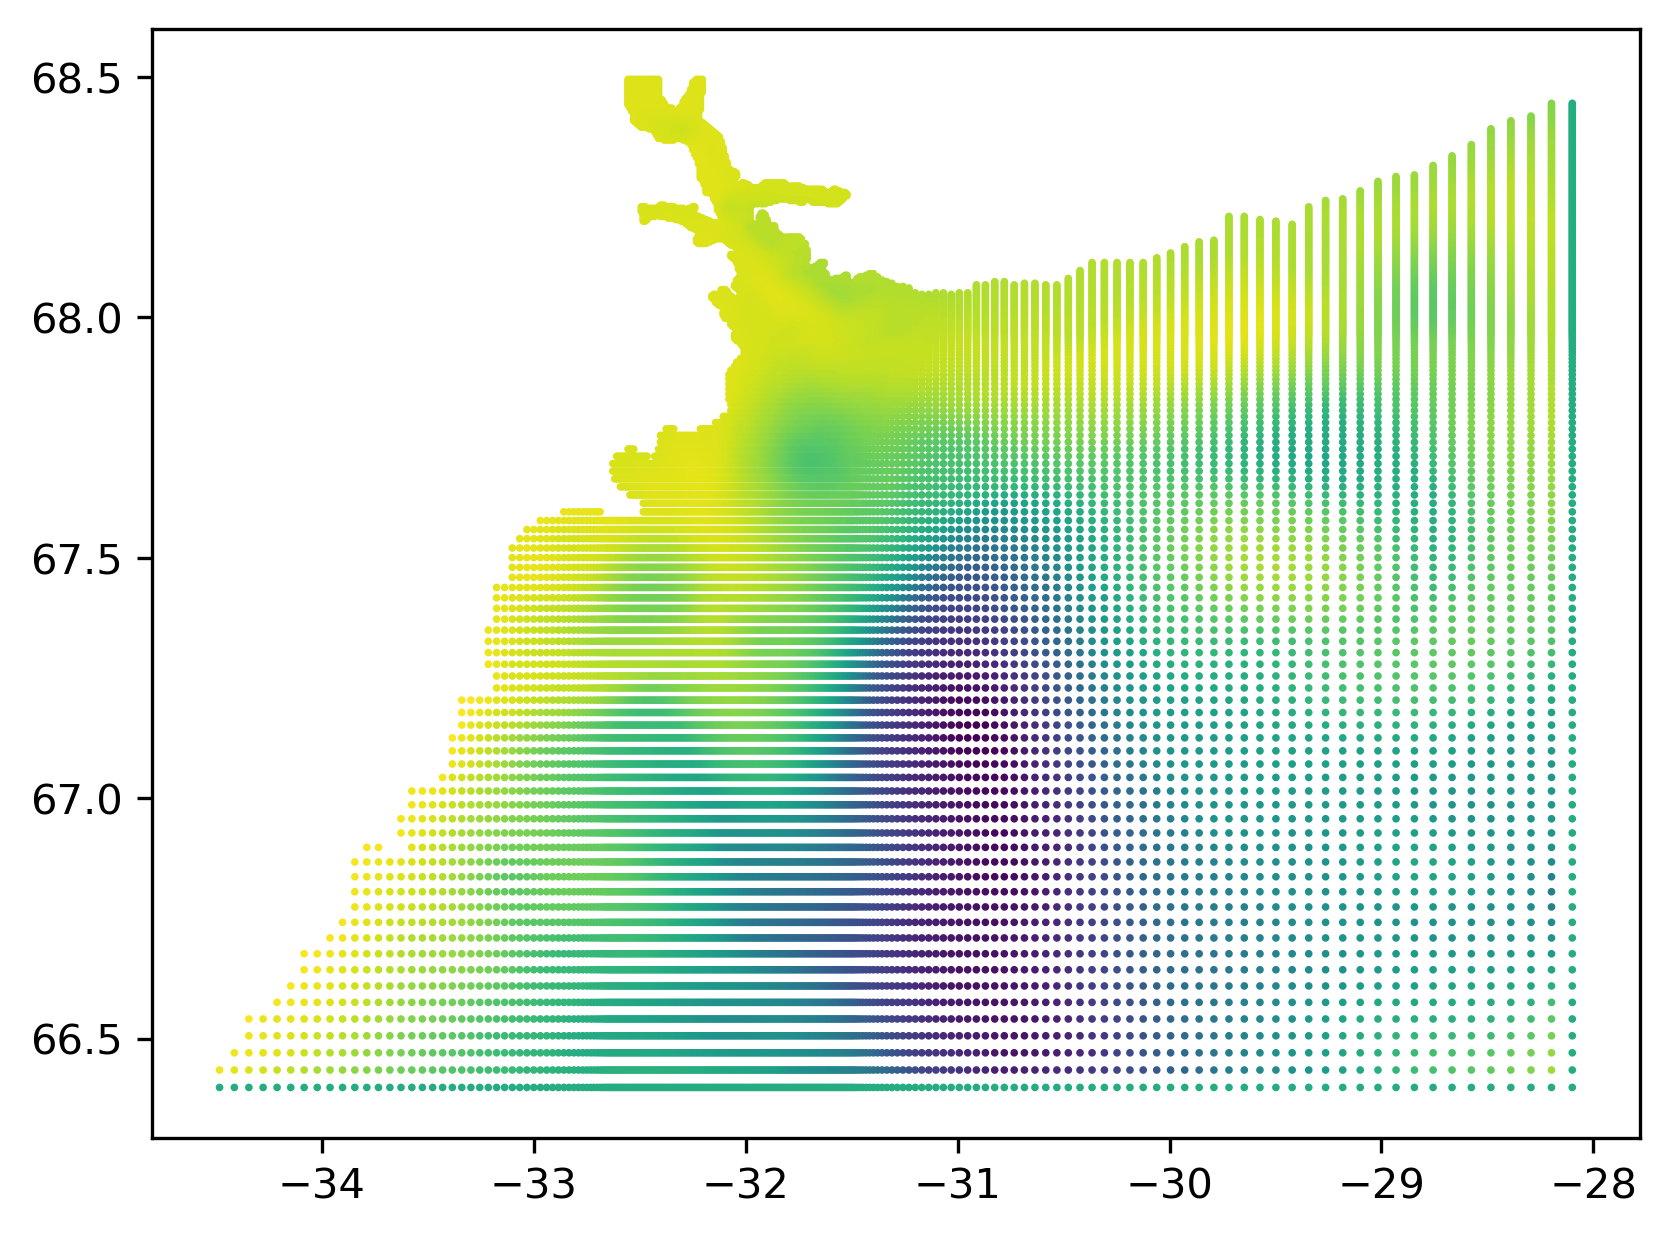

In [70]:
plt.scatter(x,y,c = eta,s = 0.7)

In [66]:
kernel.kernels

[array([[ 0,  0],
        [-1,  0],
        [ 0, -1],
        [ 0,  1],
        [ 1,  0],
        [-2,  0],
        [ 0, -2],
        [ 0,  2],
        [ 2,  0]]),
 array([[ 0,  0],
        [-1,  0],
        [ 0, -1],
        [ 0,  1],
        [ 1,  0]]),
 array([[0, 0]])]

In [71]:
def dummy_weight(rx,ry,ans):
    n = len(rx)
    return np.ones(n,ans)

In [73]:
tub['ones'] = xr.ones_like(tub['Eta'])

NameError: name 'xr' is not defined

In [72]:
kernel.hfuncs = [partial(dummy_weight,ans = len(k)) for k in kernel.kernels]

In [21]:
fjord._ds

<xarray.Dataset>
Dimensions:    (X: 240, Y: 240, Xp1: 240, Yp1: 240, Z: 100, Zp1: 101, Zu: 100,
                Zl: 100, time: 728, time_midp: 727)
Coordinates: (12/18)
  * X          (X) >f8 -34.55 -34.48 -34.41 -34.35 ... -28.39 -28.29 -28.2 -28.1
  * Y          (Y) >f8 66.4 66.43 66.47 66.51 66.54 ... 68.49 68.49 68.5 68.5
  * Xp1        (Xp1) >f8 -34.59 -34.52 -34.45 -34.38 ... -28.34 -28.25 -28.15
  * Yp1        (Yp1) >f8 66.38 66.42 66.45 66.49 ... 68.49 68.49 68.49 68.5
  * Z          (Z) >f8 -5.0 -15.0 -25.0 -35.0 ... -965.0 -975.0 -985.0 -995.0
  * Zp1        (Zp1) >f8 0.0 -10.0 -20.0 -30.0 ... -970.0 -980.0 -990.0 -1e+03
    ...         ...
    XG         (Yp1, Xp1) >f8 -34.59 -34.52 -34.45 ... -28.34 -28.25 -28.15
    YU         (Y, Xp1) >f8 66.4 66.4 66.4 66.4 66.4 ... 68.5 68.5 68.5 68.5
    XU         (Y, Xp1) >f8 -34.59 -34.52 -34.45 -34.38 ... -28.34 -28.25 -28.15
    YV         (Yp1, X) >f8 66.38 66.38 66.38 66.38 ... 68.5 68.5 68.5 68.5
    XV         (Yp1, X) >f8 -34.55 -34.48 -34.41 -34.35 ... -28.29 -28.2 -28.1
  * time_midp  (time_midp) datetime64[ns] 2007-11-29T04:30:00 ... 2008-02-27T...
Data variables: (12/35)
    rA         (Y, X) >f8 dask.array<chunksize=(240, 240), meta=np.ndarray>
    dxG        (Yp1, X) >f8 dask.array<chunksize=(240, 240), meta=np.ndarray>
    dyG        (Y, Xp1) >f8 dask.array<chunksize=(240, 240), meta=np.ndarray>
    Depth      (Y, X) >f8 dask.array<chunksize=(240, 240), meta=np.ndarray>
    rAz        (Yp1, Xp1) >f8 dask.array<chunksize=(240, 240), meta=np.ndarray>
    dxC        (Y, Xp1) >f8 dask.array<chunksize=(240, 240), meta=np.ndarray>
    ...         ...
    UTtave     (time, Z, Y, Xp1) float64 dask.array<chunksize=(1, 100, 240, 240), meta=np.ndarray>
    S          (time, Z, Y, X) float64 dask.array<chunksize=(1, 100, 240, 240), meta=np.ndarray>
    VA4DLTH    (time, Z, Y, X) float64 dask.array<chunksize=(1, 100, 240, 240), meta=np.ndarray>
    Tdiftave   (time, Zl, Y, X) float64 dask.array<chunksize=(1, 100, 240, 240), meta=np.ndarray>
    Eta        (time, Y, X) float64 dask.array<chunksize=(1, 240, 240), meta=np.ndarray>
    U          (time, Z, Y, Xp1) float64 dask.array<chunksize=(1, 100, 240, 240), meta=np.ndarray>
Attributes:
    Conventions:           CF-1.6
    title:                 netCDF wrapper of MITgcm MDS binary data
    source:                MITgcm
    history:               Created by calling `open_mdsdataset(grid_dir='/hom...
    OceanSpy_aliases:      {'S': 'Stave', 'V': 'vVeltave', 'U': 'uVeltave', '...
    OceanSpy_name:         KangerFjord
    OceanSpy_description:  A realistic numerical model constructed to simulat...
    OceanSpy_projection:   Mercator(**{})
    OceanSpy_grid_coords:  {'Y': {'Y': None, 'Yp1': -0.5}, 'X': {'X': None, '...